## Calculating camera calibration matrix using DLT

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import linalg

In [ ]:
img = cv2.imread('Assignment1_Data/IMG_5455.JPG')

In [ ]:
plt.imshow(img)

In [2]:
def DLT_matrix(xyz, uv):
    xyz = np.asarray(xyz)
    uv = np.asarray(uv)
    n = xyz.shape[0]
    A = []
    for i in range(n):
        x,y,z = xyz[i,0], xyz[i,1], xyz[i,2]
        u,v = uv[i,0], uv[i,1]
        A.append([x, y, z, 1, 0, 0, 0, 0, -u*x, -u*y, -u*z, -u])
        A.append([0, 0, 0, 0, x, y, z, 1, -v*x, -v*y, -v*z, -v])
    A = np.asarray(A) 
    U, S, Vh = np.linalg.svd(A)
    #print(Vh.shape)
    #print(Vh[-1,-1])
    #The parameters are in the last line of Vh and normalize them:
    P = Vh[-1,:]/Vh[-1,-1]
    #print(P.shape)
    P = np.array(P)
    P = np.reshape(P,(3,4))
    #Using the relation M = KR where M=P[:,:3]
    K, R = linalg.rq(P[:,:3])
    #K = K/K[-1,-1]
    #print(R, "R")
    #print(K, "K")
    #Using the relation t=K^(-1)P[:,3]
    t = np.dot(np.linalg.inv(K), P[:,3])
    #print(t,"t")
    return P, K, R, t  

In [ ]:
xyz121 = [[0,0,0,1],[36,0,0,1],[0,72,0,1],[36,72,0,1],[72,0,0,1],[72,72,0,1]]
uv121 = [[4785,2153],[3969,2073],[4913,561],[4027,513],[3193,2017],[3233,473]]

In [ ]:
DLT_matrix(xyz121, uv121)

In [ ]:
xyz122 = [[0,0,0,1],[0,0,36,1],[36,0,0,1],[0,72,0,1],[36,72,0,1],[72,72,0,1]]
uv122 = [[4785,2153],[4721,2457],[3969,2073],[4913,561],[4027,513],[3233,473]]

In [ ]:
DLT_matrix(xyz122, uv122)

In [ ]:
xyz12 = [[0,0,0,1],[0,0,36,1],[36,0,0,1],[0,72,0,1],[36,72,0,1],[0,0,72,1]]
uv12 = [[4785,2153],[4721,2457],[3969,2073],[4913,561],[4027,513],[4641,2785]]

In [ ]:
print(img.shape)

In [ ]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv12)):
    v, u =uv12[i]
    u = int(u)
    v = int(v)
    img[u-20:u+20,v-20:v+20] = [0,255,0]
plt.imshow(img)
plt.axis('off')
plt.savefig('saved/dlt1.jpg',bbox_inches='tight')
plt.show()

In [ ]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv12)):
    v, u =uv12[i]
    u = int(u)
    v = int(v)
    v1, u1 = uv12[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img, (v, u), (v1, u1), (0,255,0), 2)
plt.imshow(img)
plt.axis('off')
plt.savefig('saved/dlt11.jpg',bbox_inches='tight')
plt.show()

In [ ]:
P, K, R, t   = DLT_matrix(xyz12, uv12)

In [ ]:
print('The Projection matrix is \n',P)
print('The Intrinsic matrix is \n',K)
print('The Rotation matrix is \n',R)
print('The Translation matrix is \n',t)

In [ ]:
R1 = np.array(R)
print(R1.shape)
t1 = np.array(t)
print(t1.shape)
print(t1)

In [ ]:
t2 = np.reshape(t1,(3,1))
print(t2.shape)
Rt = np.append(R1,t2, axis=1)
print(R)
print(t)
print(Rt)

In [ ]:
print(P)
print(np.matmul(K,Rt))

In [ ]:
dlt_world_origin = np.matmul(P,xyz12[0])
print(dlt_world_origin)
print(uv12[0])

In [ ]:
DLT_uv12= []
for i in range(len(xyz12)):
    l = np.matmul(P,xyz12[i])
    DLT_uv12.append(l)

In [ ]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv12)):
    v, u =uv12[i]
    v1,u1,_ = DLT_uv12[i]
    u = int(u)
    v = int(v)
    v1 = int(v1)
    u1 = int(u1)
    img[u-20:u+20,v-20:v+20] = [0,255,0]
    img[u1-20:u1+20,v1-20:v1+20] = [255,0,0]
plt.imshow(img)
plt.axis('off')
plt.savefig('saved/dlt2.jpg',bbox_inches='tight')
plt.show()

In [ ]:
DLT_uv12

In [ ]:
figure = plt.figure(figsize=(18,18))
for i in range(len(DLT_uv12)):
    v, u,_ =DLT_uv12[i]
    u = int(u)
    v = int(v)
    v1, u1,_ = DLT_uv12[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img, (v, u), (v1, u1), (255,0,0), 2)
plt.imshow(img)
plt.axis('off')
plt.savefig('saved/dlt12222.jpg',bbox_inches='tight')
plt.show()

In [ ]:
uv121 = np.column_stack((np.array(uv12),np.ones((np.array(uv12).shape[0]))))
np.array(uv121).shape


In [ ]:
calibration_error = np.sqrt(np.sum((np.array(uv121)-np.array(DLT_uv12))**2))/np.array(uv12).shape[0]

In [ ]:
print(calibration_error)

### Correcting the distortion of the image using cv package

In [4]:
_3d_points = np.array([[0,0,0],[36,0,0],[0,72,0],[36,72,0]])
#print(_3d_points.shape)
_2d_points= np.array([[4785,2153],[3969,2073],[4913,561],[4027,513]])
#print(type(_2d_points))
#print(_3d_points[2])

In [8]:
_3d_points = _3d_points.astype('float32')
_3d_points1 =[_3d_points]
_2d_points = _2d_points.astype('float32')
_2d_points1 = [_2d_points]

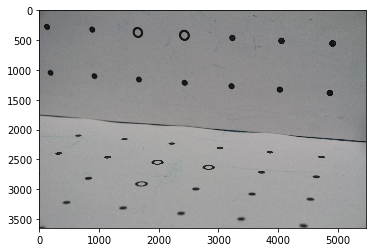

In [9]:
img1 = cv2.imread('Assignment1_Data/IMG_5455.JPG')
plt.imshow(img1)

In [10]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points1, _2d_points1, (img1.shape[1],img1.shape[0]), None, None)

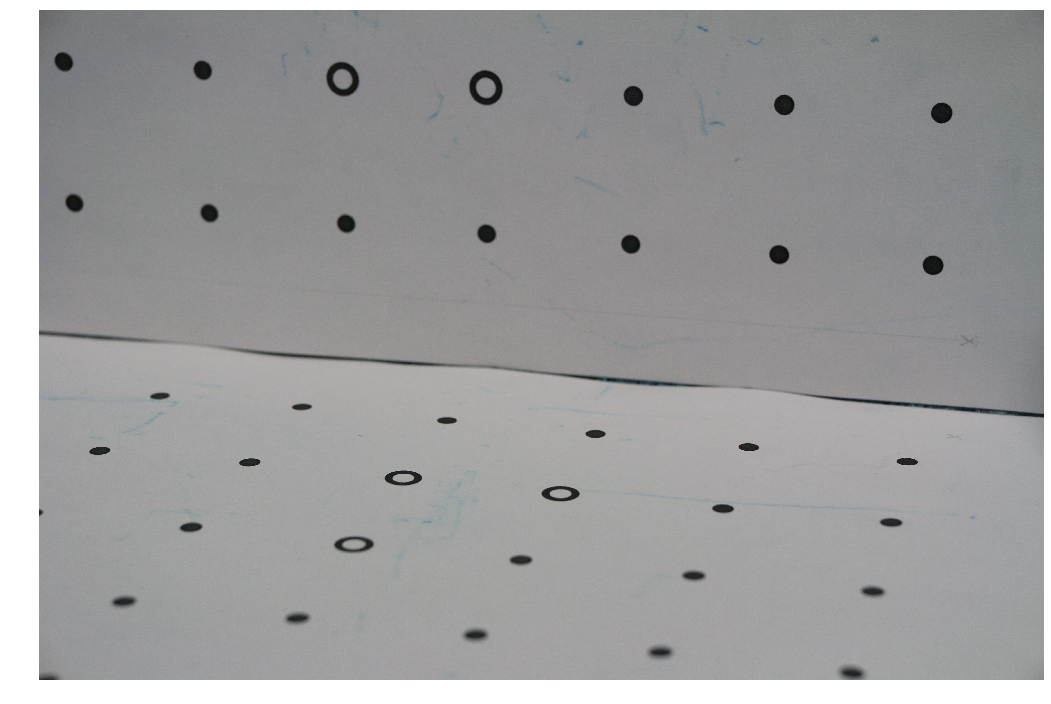

In [11]:
figure = plt.figure(figsize=(18,18))
img_undistorted=cv2.undistort(img1, mtx, dist)
plt.imshow(img_undistorted)
plt.axis('off')
plt.savefig('saved/img_undistorted.jpg',bbox_inches='tight')
plt.show()

In [12]:
img_undistorted = cv2.imread('img_undistorted.jpg')

In [13]:
_3d_points_d = np.array([[0,0,0,1],[36,0,0,1],[0,72,0,1],[36,72,0,1],[0,0,72,1],[36,0,72,1]])
print(_3d_points_d.shape)
_2d_points_d= np.array([[324,139],[274,134],[333,44],[282,41],[317,177],[262,173]])
print(type(_2d_points_d))
print(_2d_points_d.shape)

(6, 4)
<class 'numpy.ndarray'>
(6, 2)


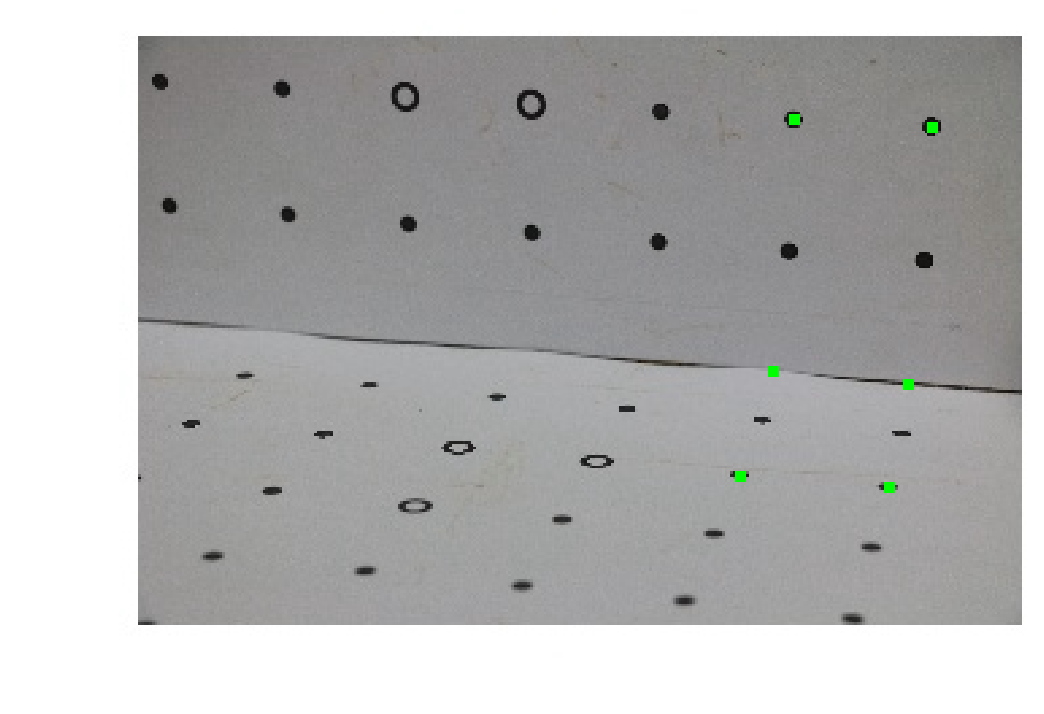

In [14]:
figure = plt.figure(figsize=(18,18))
for i in range(len(_2d_points_d)):
    v, u =_2d_points_d[i]
    u = int(u)
    v = int(v)
    img_undistorted[u-2:u+2,v-2:v+2] = [0,255,0]
plt.imshow(img_undistorted)
plt.axis('off')
plt.savefig('saved/dlt_distorted.jpg',bbox_inches='tight')
plt.show()

324 139
262 173
274 134
324 139
333 44
274 134
282 41
333 44
317 177
282 41
262 173
317 177


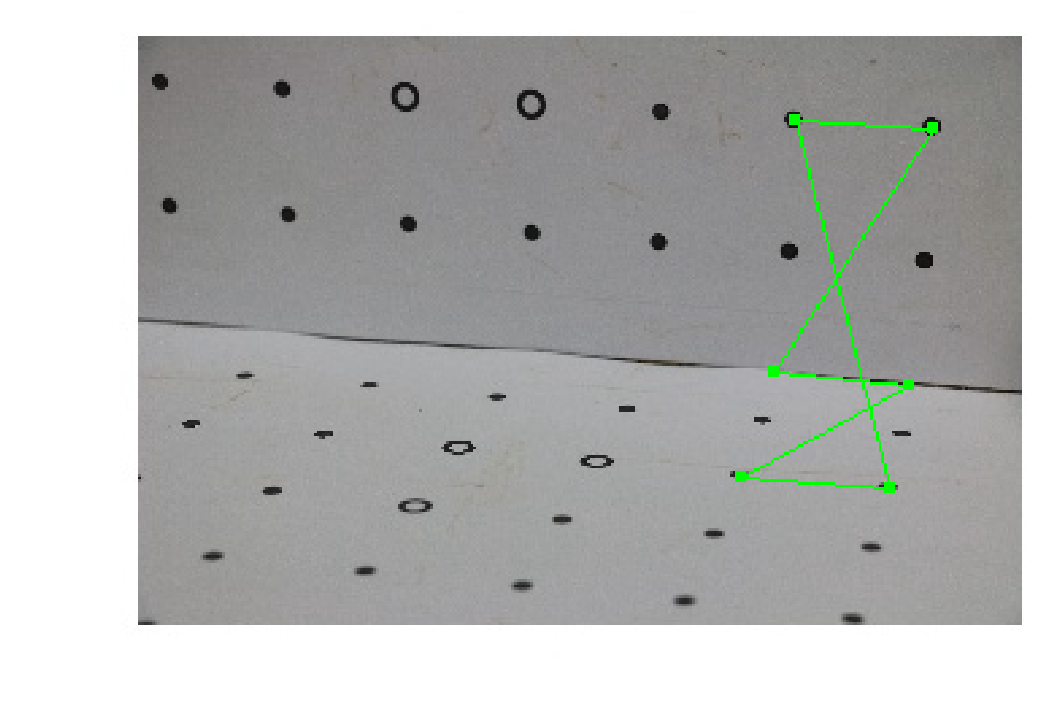

In [15]:
figure = plt.figure(figsize=(18,18))
for i in range(len(_2d_points_d)):
    v, u =_2d_points_d[i]
    u = int(u)
    v = int(v)
    v1, u1 = _2d_points_d[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img_undistorted, (v, u), (v1, u1), (0,255,0), 1)
plt.imshow(img_undistorted)
plt.axis('off')
plt.savefig('saved/dlt_disttttt11.jpg',bbox_inches='tight')
plt.show()

### Calculating DLT after correcting distortion

In [17]:
P1, K1, R1, t1 =DLT_matrix(_3d_points_d, _2d_points_d)
print('The Projection matrix is \n',P1)
print('The Intrinsic matrix is \n',K1)
print('The Rotation matrix is \n',R1)
print('The Translation matrix is \n',t1)

The Projection matrix is 
 [[-1.32823371e+00  4.75779966e-02 -4.96590032e-01  3.24035965e+02]
 [-8.08045933e-02 -1.32067518e+00  3.16941663e-01  1.38505951e+02]
 [ 2.28455727e-04 -2.30635394e-04 -1.25715418e-03  1.00000000e+00]]
The Intrinsic matrix is 
 [[-1.39695929e+00 -6.79424214e-02  2.38660210e-01]
 [ 0.00000000e+00  1.35782258e+00 -8.64995953e-02]
 [ 0.00000000e+00  0.00000000e+00  1.29839182e-03]]
The Rotation matrix is 
 [[ 0.98321288 -0.01654959  0.18171004]
 [-0.04830141 -0.98395789  0.17173771]
 [ 0.17595284 -0.17763158 -0.96823944]]
The Translation matrix is 
 [-107.72531264  151.07019064  770.18353213]


In [ ]:
DLT_matrix(_3d_points_d, _2d_points_d)

In [18]:
P1 = DLT_matrix(_3d_points_d, _2d_points_d)[0]

In [19]:
dlt_world_origin_distorted = np.matmul(P1,[0,0,0,1])
print(dlt_world_origin_distorted)
print(_2d_points[0])

[324.03596472 138.50595146   1.        ]
[4785. 2153.]


In [20]:
DLT_2d_points_d= []
for i in range(len(_3d_points_d)):
    l = np.matmul(P1,_3d_points_d[i])
    DLT_2d_points_d.append(l)

In [21]:
DLT_2d_points_d[0]

array([324.03596472, 138.50595146,   1.        ])

In [22]:
len(DLT_2d_points_d)

6

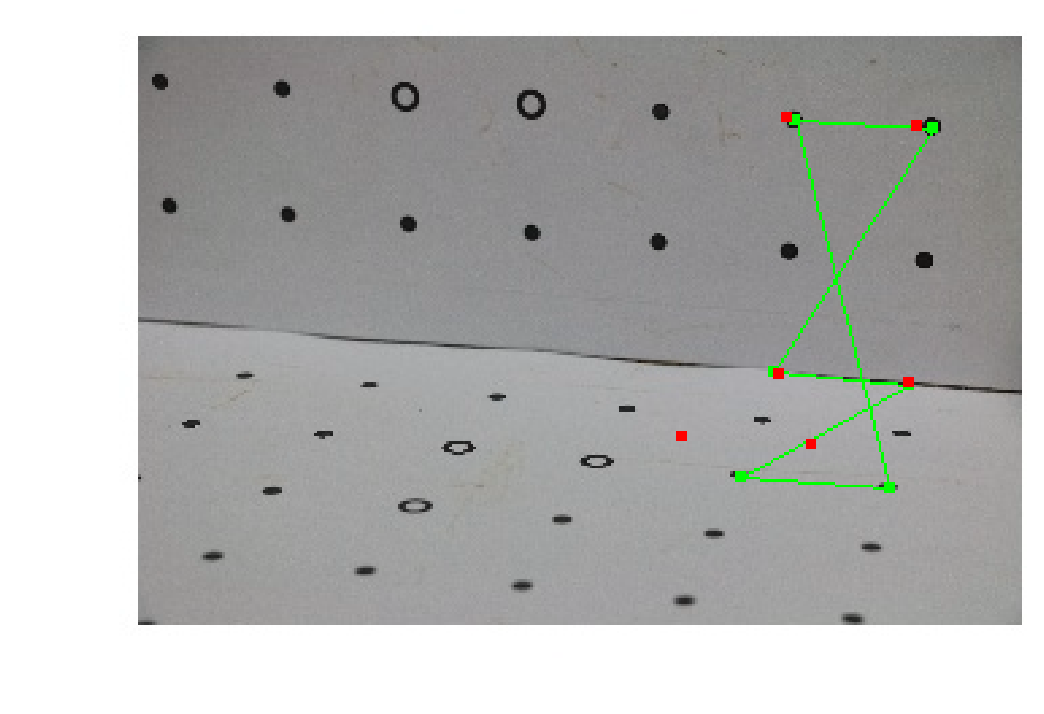

In [23]:
figure = plt.figure(figsize=(18,18))
for i in range(len(_2d_points_d)):
    v, u =_2d_points_d[i]
    v1,u1,_ = DLT_2d_points_d[i]
    u = int(u)
    v = int(v)
    v1 = int(v1)
    u1 = int(u1)
    img_undistorted[u-2:u+2,v-2:v+2] = [0,255,0]
    img_undistorted[u1-2:u1+2,v1-2:v1+2] = [255,0,0]
plt.imshow(img_undistorted)
plt.axis('off')
plt.savefig('saved/dlt_distorted2.jpg',bbox_inches='tight')
plt.show()

324 138
240 158
276 135
324 138
327 43
276 135
279 40
327 43
288 161
279 40
240 158
288 161


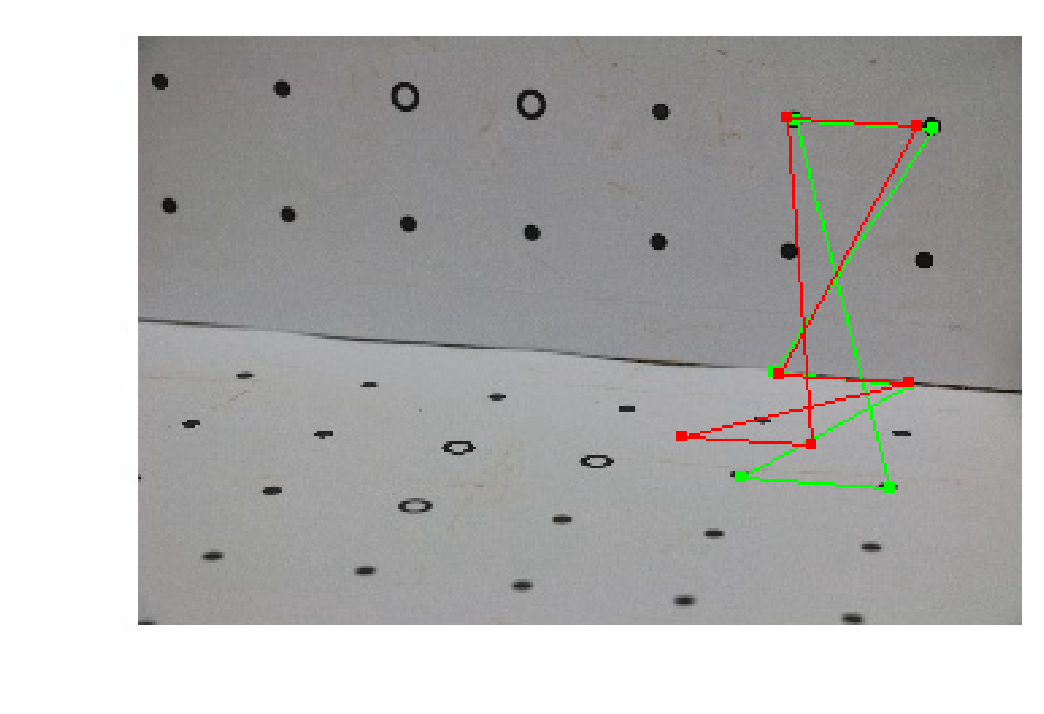

In [24]:
figure = plt.figure(figsize=(18,18))
for i in range(len(DLT_2d_points_d)):
    v, u,_ =DLT_2d_points_d[i]
    u = int(u)
    v = int(v)
    v1, u1,_ = DLT_2d_points_d[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img_undistorted, (v, u), (v1, u1), (255,0,0), 1)
plt.imshow(img_undistorted)
plt.axis('off')
plt.savefig('saved/dlt_distttttttttttt22.jpg',bbox_inches='tight')
plt.show()

### Calculating DLT for image taken from own camera

In [25]:
img_223 = cv2.imread('DLT/dlt3.jpg')

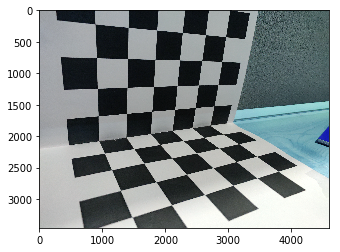

In [26]:
plt.imshow(img_223)

In [27]:
xyz1 = [[0,0,0,1],[0,25,0,1],[25,0,0,1],[50,0,25,1],[25,25,0,1],[50,0,0,1]]
uv1 = [[2993,1793],[3057,1497],[2753,1833],[3209,1929],[2793,1521],[2465,1881]]

In [28]:
uv1 = [[2993,1793],[3057,1497],[2753,1833],[3209,1929],[2793,1521],[2465,1881]]

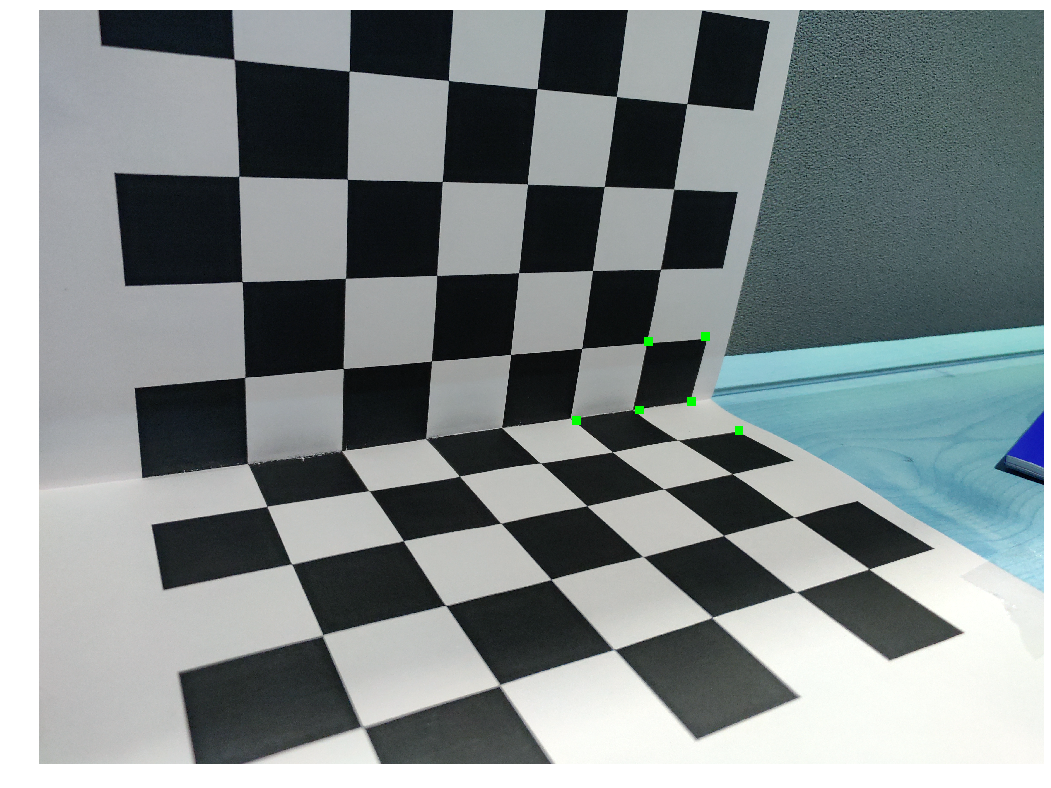

In [29]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv1)):
    v, u =uv1[i]
    u = int(u)
    v = int(v)
    img_223[u-20:u+20,v-20:v+20] = [0,255,0]
plt.imshow(img_223)
plt.axis('off')
plt.savefig('save/dlt_own.jpg',bbox_inches='tight')
plt.show()

2993 1793
2465 1881
3057 1497
2993 1793
2753 1833
3057 1497
3209 1929
2753 1833
2793 1521
3209 1929
2465 1881
2793 1521


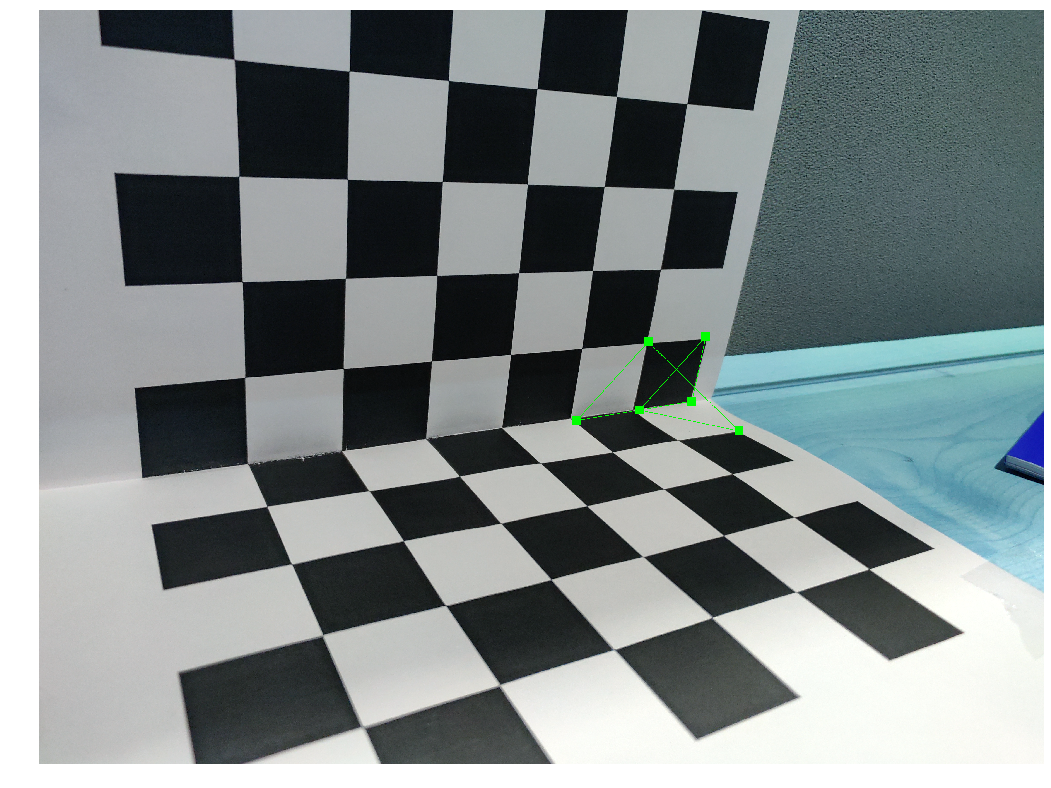

In [31]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv1)):
    v, u =uv1[i]
    u = int(u)
    v = int(v)
    v1, u1 = uv1[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img_223, (v, u), (v1, u1), (0,255,0), 2)
plt.imshow(img_223)
plt.axis('off')
plt.savefig('saved/dlt_own_11.jpg',bbox_inches='tight')
plt.show()

In [33]:
P2, K2, R2, t2 = DLT_matrix(xyz1, uv1)
print('The Projection matrix is \n',P2)
print('The Intrinsic matrix is \n',K2)
print('The Rotation matrix is \n',R2)
print('The Translation matrix is \n',t2)

The Projection matrix is 
 [[-1.79597266e+01 -7.62747124e+00 -3.38245612e+12  3.00442901e+03]
 [-3.58777376e+00 -1.66030030e+01 -2.03326826e+12  1.79394778e+03]
 [-2.87348955e-03 -3.16234047e-03 -1.05405301e+09  1.00000000e+00]]
The Intrinsic matrix is 
 [[-8.12982293e+00 -4.07721097e+00  3.38245612e+12]
 [ 0.00000000e+00  1.06832850e+01  2.03326826e+12]
 [ 0.00000000e+00  0.00000000e+00  1.05405301e+09]]
The Rotation matrix is 
 [[ 9.83110362e-01  1.83013705e-01 -3.22916300e-12]
 [ 1.83013705e-01 -9.83110362e-01  2.45058046e-12]
 [-2.72613380e-12 -3.00017213e-12 -1.00000000e+00]]
The Translation matrix is 
 [ 3.15028813e+01 -1.26414506e+01  9.48718884e-10]


In [34]:
P2 = DLT_matrix(xyz1, uv1)[0]

In [35]:
dlt_world_origin_own = np.matmul(P2,[0,0,0,1])
print(dlt_world_origin_own)
print(uv1[0])

[3.00442901e+03 1.79394778e+03 1.00000000e+00]
[2993, 1793]


In [36]:
DLT_uv1= []
for i in range(len(xyz1)):
    l = np.matmul(P2,xyz1[i])
    DLT_uv1.append(l)

In [37]:
print(DLT_uv1[1])
print(uv1[1])

[2.81374223e+03 1.37887271e+03 9.20941488e-01]
[3057, 1497]


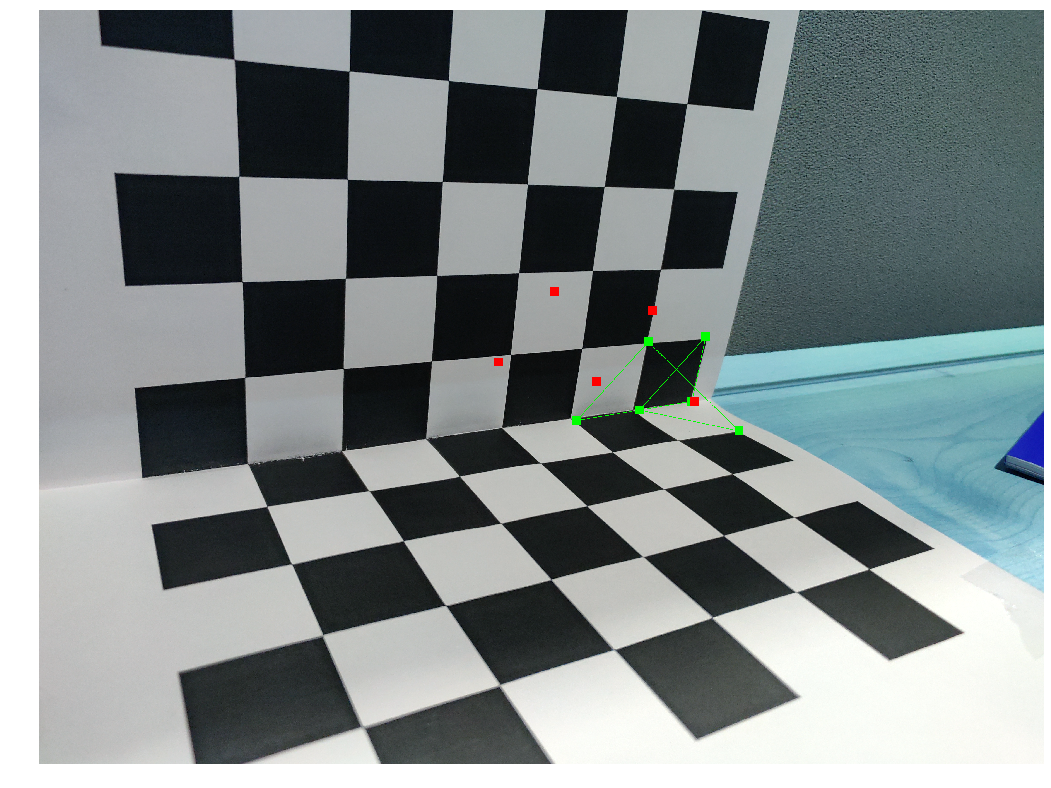

In [38]:
figure = plt.figure(figsize=(18,18))
for i in range(len(uv1)):
    v, u =uv1[i]
    v1,u1,_ = DLT_uv1[i]
    u = int(u)
    v = int(v)
    v1 = int(v1)
    u1 = int(u1)
    img_223[u-20:u+20,v-20:v+20] = [0,255,0]
    img_223[u1-20:u1+20,v1-20:v1+20] = [255,0,0]
plt.imshow(img_223)
plt.axis('off')
plt.savefig('saved/dlt_own2.jpg',bbox_inches='tight')
plt.show()

In [39]:
print(DLT_uv1)


[array([3.00442901e+03, 1.79394778e+03, 1.00000000e+00]), array([2.81374223e+03, 1.37887271e+03, 9.20941488e-01]), array([2.55543585e+03, 1.70425344e+03, 9.28162761e-01]), array([-8.45614031e+13, -5.08317066e+13, -2.63513254e+10]), array([2.36474907e+03, 1.28917836e+03, 8.49104249e-01]), array([2.10644268e+03, 1.61455909e+03, 8.56325523e-01])]


3004 1793
2106 1614
2813 1378
3004 1793
2555 1704
2813 1378


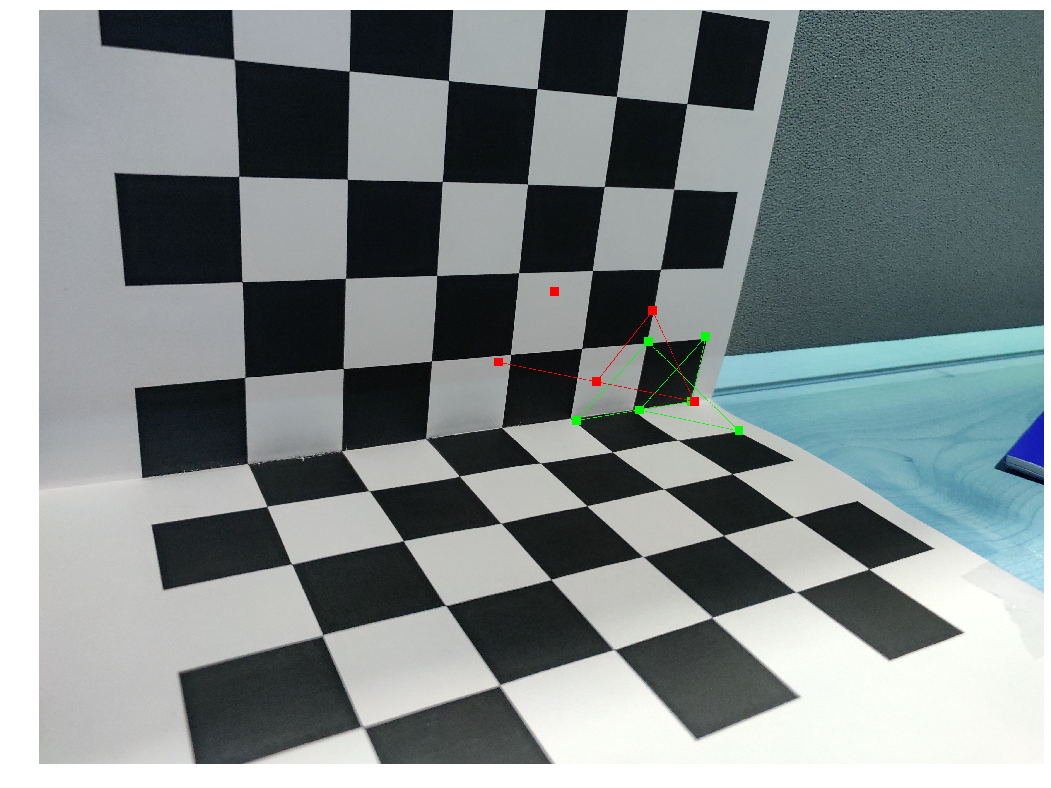

In [42]:
figure = plt.figure(figsize=(18,18))
for i in range(len(DLT_uv1)-3):
    v, u,_ =DLT_uv1[i]
    u = int(u)
    v = int(v)
    v1, u1,_ = DLT_uv1[i-1]
    u1 = int(u1)
    v1 = int(v1)
    print(v,u)
    print(v1,u1)
    cv2.line(img_223, (v, u), (v1, u1), (255,0,0), 2)
plt.imshow(img_223)
plt.axis('off')
plt.savefig('saved/dlt_own_22.jpg',bbox_inches='tight')
plt.show()